In [1]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
# loading data
(org_train_images, org_train_labels), (org_test_images, org_test_labels) = mnist.load_data()

In [5]:
len(org_train_images), len(org_test_images)

(60000, 10000)

In [6]:
# Designing network
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

# optimizer, loss function, metrics
network.compile(optimizer='rmsprop', 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
train_images = org_train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = org_test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [8]:
train_labels = to_categorical(org_train_labels)
test_labels = to_categorical(org_test_labels)

In [85]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)
network.save('mnist-dense.h5')

Epoch 1/5
60000/60000 [==============================] - 7s 110us/step - loss: 0.0282 - acc: 0.9918
Epoch 2/5
60000/60000 [==============================] - 6s 107us/step - loss: 0.0222 - acc: 0.9932
Epoch 3/5
60000/60000 [==============================] - 6s 104us/step - loss: 0.0170 - acc: 0.9951
Epoch 4/5
60000/60000 [==============================] - 6s 102us/step - loss: 0.0128 - acc: 0.9963
Epoch 5/5
60000/60000 [==============================] - 6s 103us/step - loss: 0.0103 - acc: 0.9972


In [76]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 0s 25us/step
test_acc: 0.9806


In [19]:
# Predicting
from tensorflow.keras.models import load_model
import numpy as np

classifier = load_model('mnist-dense.h5')

sample = test_images[120].reshape((1, 28 * 28))

prediction = classifier.predict(sample, batch_size=None,steps=1)

print(np.argmax(prediction))
print()

Instructions for updating:
Use tf.cast instead.
5



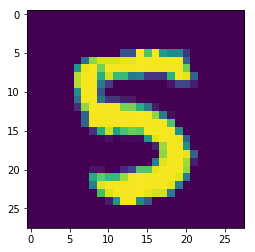

In [21]:
import matplotlib.pyplot as plt

plt.imshow(org_test_images[120])
plt.show()